## Use Machine Learning and Deep Learning to predict and analyze US Housing Price
## Team: Xiangyu Chen, Fanyu Mou, Sike Dong


As an important source of economic development, real estate has become a pillar industry for the United States. There are several contributions for the housing price, for instance, type of house, size, location, tax and cost etc.. In this project, we analyze 4 datasets based on Linear Regression and Deep Learning Regression to analyze the factors and their relationships with housing prices, then applying Random Forest to do the prediction. 

We will use King Country Housing Price Database to do sample analyze and compare all results from 4 datasets to make conclusion.


## KC house data

### Data Preparation

#### Load data from csv

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# loading data king country as data
data = pd.read_csv('kc_house_data.csv')

In [9]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now we have loaded dataset. Before analysing it, we need to make sure there is no incorrect, incomplete, improperly formatted data in dataset.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [11]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
data.duplicated().sum()

0

In this part we check whether there are duplicated rows or null value in the dataset. If there are abnormal value, we will drop them.
Results show that there is no duplication or null value. We can move forward to explore datasets. If it has null value, we can use following code to drop null value.

In [56]:
data=data.dropna(axis=0, how='any')

### Data Exploration

For data exploration, first we use the describe() method to show the summary statistics of the numeric variables. And the we can use savefig to get attribute data's distribution and get their distibution chart. 

In [10]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


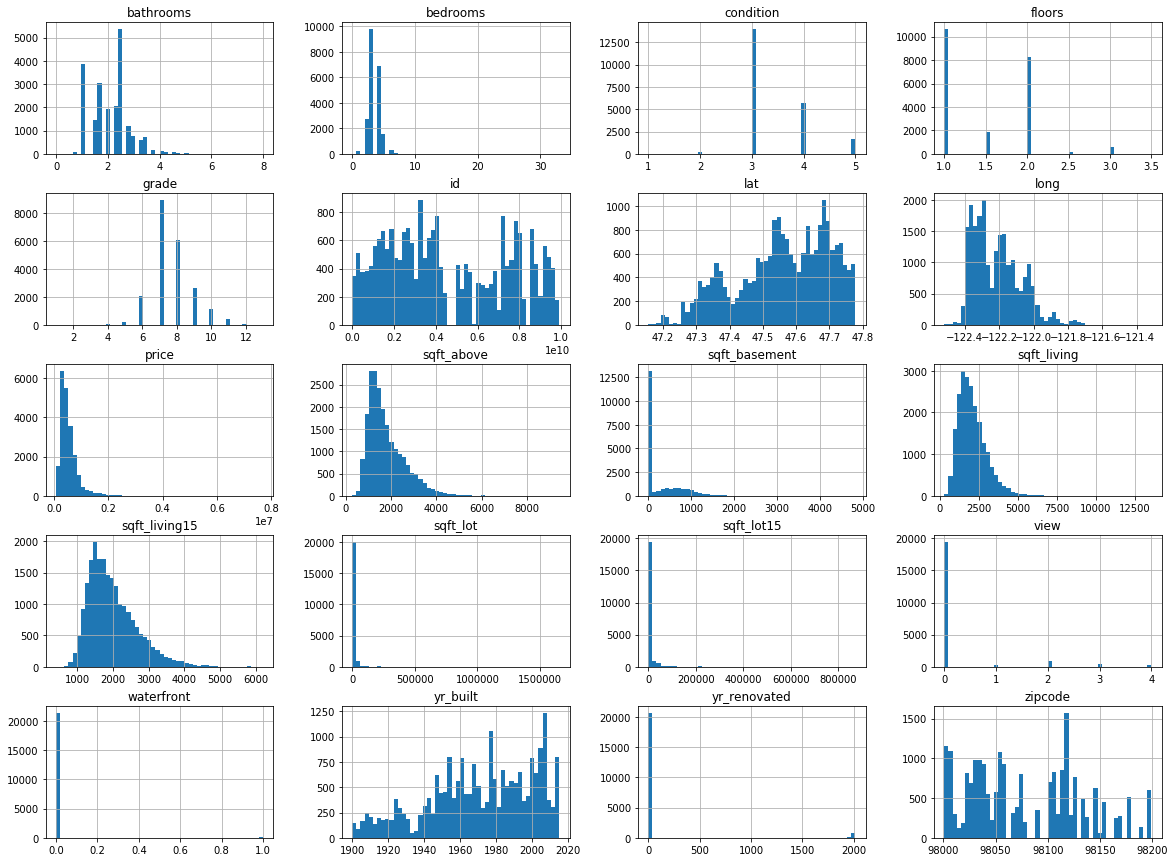

In [16]:
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Some of the distribution are a little bit right skewed, but this is not abnormal.

### Mutiple Regression

To explore the house price, we use heapmap matrix to get correlation of each atttributes and their relationships.

In [76]:
# Function plot_correlation_map for visualization 
def plot_correlation_map( df ):
    corr = df.corr()
    #set size of the figure
    map , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 20 , 10 , as_cmap = True )
    map = sns.heatmap(
        corr,
        cmap = cmap,
        square=True, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 8 }
    )

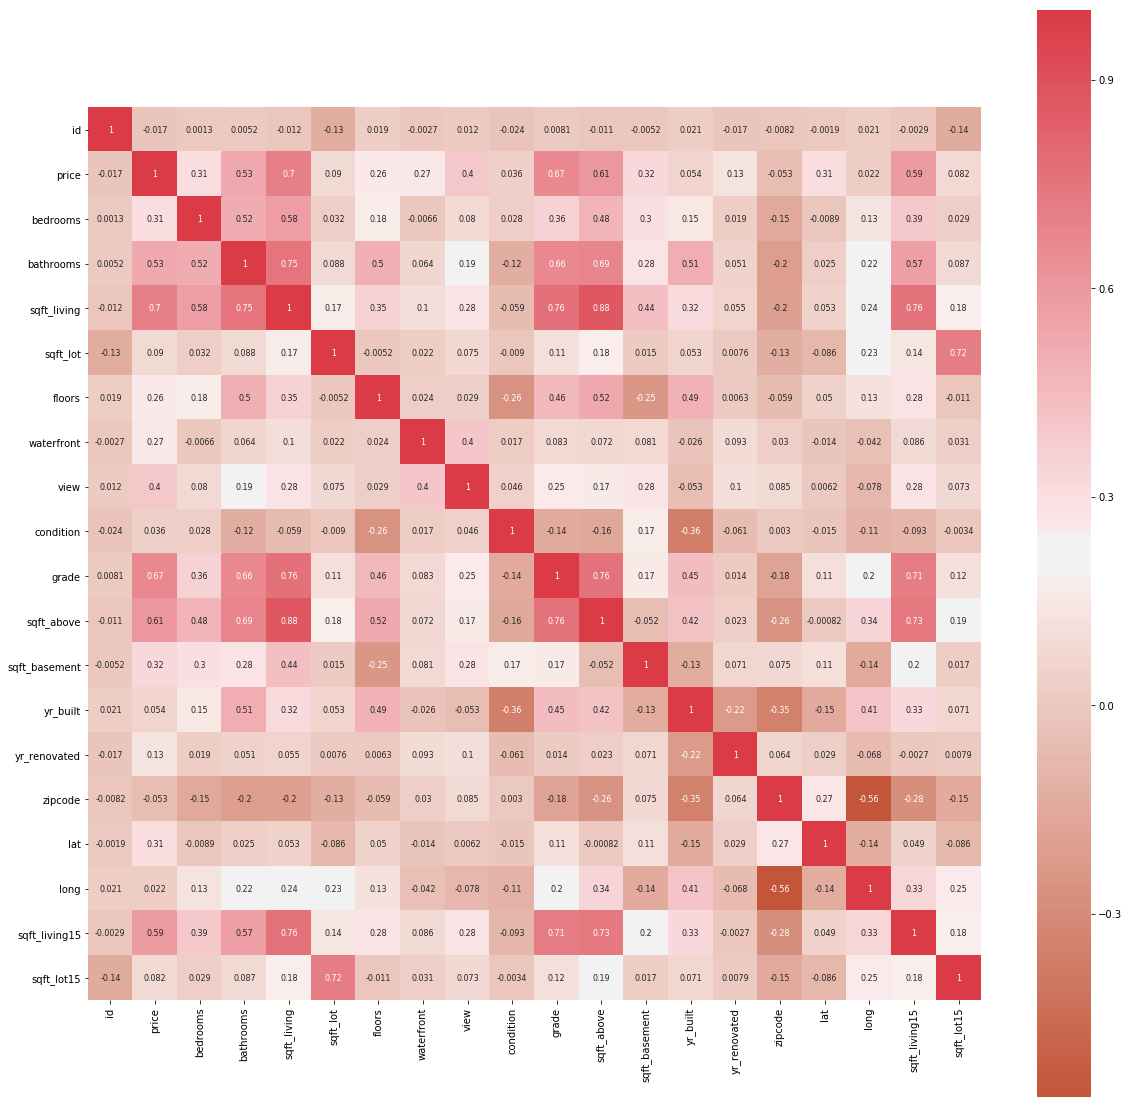

In [11]:
plot_correlation_map(data)

Then we try to pick top relative attributes from heatmap for regression

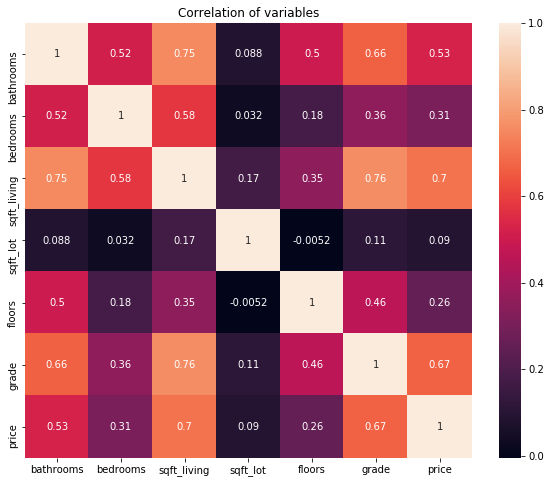

In [9]:
# choose key variables and show the corresponed heatmap
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]
##set heatmapsize
plt.figure(figsize=(10,8))
##set title
plt.title('Correlation of variables')
##set max corr=1,add note in blank and data type is float
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

From this heaptmap we can find that bathroom number, living room sqft and grade are more relative to house price. So we pick these 4 attributes to do regression. 

In [23]:
# Setup X, y
X = data[["bedrooms","bathrooms","sqft_living","grade"]]
y = data["price"]

Then we will apply KNeighbors Regression,Linear Regression, Lasso Regression, Ridge Regression, Decision Tree Regression and Support Vector Regression to our dataset.

K-nearest neighbors (kNN) is a non-parametric method used for classification and regression.

Linear regression is the simplest and most widely used statistical technique for predictive modeling. It basically gives us an equation, where we have our features as independent variables, on which our target variable is dependent upon. We expect linear regrssion will perform well with our dataset.

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value.

Lasso Refression is similar to Ridge regression, and it is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. 

Decision tree builds regression  models in the form of a tree structure. It brakes down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. 

The Support Vector Regression (SVR) are very specific class of algorithms, characterized by usage of kernels, absence of local minima, sparseness of the solution and capacity control obtained by acting on the margin, or on number of support vectors.

In [94]:
# load state model with ordinary least squares model, fit with X, y
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.033e+04
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:15:17   Log-Likelihood:            -2.9964e+05
No. Observations:               21613   AIC:                         5.993e+05
Df Residuals:                   21609   BIC:                         5.993e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -7.365e+04   2073.607    -35.520      0.000   -7.77e+04   -6.96e+04
bathrooms   -1.708e+04   3548.852     -4.814      0.000    -2.4e+04   -1.01e+04
sqft_living   290.4100      3.046     95.340      0.000     284.439     296.380
grade         2.96e+04   1058.774     27.953      0.000    2.75e+04    3.17e+04
==============================================================================
Omnibus:                    15974.689   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           698243.000
Skew:                           3.104   Prob(JB):                         0.00
Kurtosis:                      30.144   Cond. No.                     4.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We split dataset into train data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on.

In [24]:
##Get train set and test set
X_train,X_test, y_train, y_true= train_test_split(X, y, test_size=0.2) 

In [29]:
# Set up knn, linear regression, ridge, lasso, decision tree and svr model
knn = KNeighborsRegressor(n_neighbors=3)
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision = DecisionTreeRegressor()
svr = SVR()

In [30]:
# fit our model with train data
knn.fit(X_train,y_train)
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
decision.fit(X_train,y_train)
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
# get prediction
y_pre_knn = knn.predict(X_test)
y_pre_linear = linear.predict(X_test)
y_pre_ridge = ridge.predict(X_test)
y_pre_lasso = lasso.predict(X_test)
y_pre_decision = decision.predict(X_test)
y_pre_svr = svr.predict(X_test)

Now we can get the accuracy score of each model.

In [32]:
# display score of our prediction
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)

0.45983169977508631

0.53332511700548646

0.53332515814643433

0.5333253689801698

0.36158826394531263

-0.055227593563368815

From the result, linear regression, lasso regression and ridge regression perform better as we expect.For other data sets, we can choose those three regressions to do analyze.

### Deep Learning Regression

The term deep learning regression refers to training neural networks. Neural networks are used for the purpose of clustering through unsupervised learning, classification through supervised learning, or regression.

First, we will create a baseline neural network model for the regression problem.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
# load dataset
dataframe = pd.read_csv('kc_house_Sample.csv')
dataframe=dataframe.dropna(axis=0, how='any')
# split into input (X) and output (Y) variables
X = dataframe[["bedrooms", "bathrooms","grade","sqft_living"]]
Y = dataframe["price"]

#### Baseline Model
The efficient ADAM optimization algorithm is used and a mean squared error loss function is optimized. This will be the same metric that we will use to evaluate the performance of the model.

In [5]:
# define base model
def baseline_model():
    # create 3-layer model(more layer will make the model more accurate)
    model = Sequential()
    model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model(after test, cosine_proximity is the one fit our model most)
    model.compile(loss='cosine_proximity', optimizer='adam')
    return model

We can create Keras models and evaluate them with scikit-learn by using handy wrapper objects provided by the Keras library. We also initialize the random number generator with a constant random seed, to ensure we compare models consistently.

In [6]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

We will use 10-fold cross validation to evaluate the model. The result reports the mean squared error including the average and standard deviation (average variance) across all 10 folds of the cross validation evaluation.

In [7]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Results: -1.00 (0.00) cosine_proximity


#### Modeling The Standardized Dataset
Continuing on from the above baseline model, we can re-evaluate the same model using a standardized version of the input dataset. In order to avoid data leakage, we can use scikit-learn’s Pipeline framework to perform the standardization during the model evaluation process, within each fold of the cross validation.

In [8]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Standardized: -0.80 (0.60) cosine_proximity


### Random Forest
Random forests, also called random decision forests are an ensemble learning method for regression that operate by constructing a multitude of decision trees at training time and outputting the class that is the mean prediction (regression) of the individual trees.

we start with import

In [58]:
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#### Data preperation

Random forest regression need values to be SparseDataFrame, so we use panda get_dummies to get our partial data with most related variables. In theory, we need labels to be what we wanna to predict, and features be other data we use to predict our labels. So, we applay column "price" to labels, and other variables to features.

In [59]:
features = pd.get_dummies(X)

In [60]:
labels = data["price"]
features_list = list(features.columns)
features = np.array(features)
labels = np.array(labels)

With all initial setup done, we can do train test split, with test size and train size at ratio 1:3

In [61]:
# split train and test data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [62]:
train_features.shape

(16209, 4)

#### Random Forest Regression setup

After, we already splited train and test data. We want to setup our random forest model, we want to have the same result everytime if we reproduce our random forest regression, so we apply random_state = 42. For every random forest model, we need to do hyperparameter first in order to find the best set  of parameters. Lets find the default set parameters for our model.

In [63]:
# Set up our randomforest with random_state = 42
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


#### Hyperparameter Tuning

As we saw the default parameters, we want to do further hyperparameter to find best variables to improve our random forest model. First we initialize our random parameter grid

In [64]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


We should use our random forest model to estimate the best variables we already setup. So, Let's fit our model with test and train data. 

In [65]:
# fit our randomforest model with features and labels
rf.fit(features, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

After that we need a method to estimate the hyperparameter. 
There is a randmonized Search CV that randomized search on hyper parameters. RandomizedSearchCV implements a “fit” and a “score” method. The parameters of the estimator used to apply those methods are optimized by cross-validated search over parameter settings.
The randomizedSerch cross validation is a good way to find hyperparameter for our random forest model.

In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.9min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

There we found the best parameters

In [67]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

#### Get result from Random Forest Regression

In [68]:
best_random = rf_random.best_estimator_
best_random.fit(train_features, train_labels)
predictions = best_random.predict(test_features)

we can find the score of our best random hyperparameter

In [69]:
rf_random.best_score_

0.59539182246486422

We need to know how well our random forest model with best randomized parameter fit our dataset

In [70]:
best_random.score(test_features, test_labels)

0.59203265237850133

#### Get the prediction
Let us see our prediction related to our test_features

In [71]:
np.set_printoptions(threshold=np.inf)  
predictions

array([  521029.06732802,   648226.06792119,   961138.99730253,
        2092681.8198481 ,   657698.61863541,   410253.82184832,
         644812.550084  ,   365277.42133243,   442510.09606766,
         401957.73208531,   563692.09291574,   434818.59840311,
         415557.54758046,   374252.53738677,   282853.16339163,
        1426513.57159643,   424808.45860649,  1301954.86974751,
         383685.85380371,   473874.72736152,   431816.61341131,
        1701619.5728188 ,   696049.49702914,   666128.4277069 ,
         503406.80666475,   474466.7641537 ,   308335.76451688,
         237482.93513656,   528753.4764216 ,   378113.69116975,
         349745.84975232,   479892.53036881,   515763.32659459,
         361919.7280442 ,   345903.35434699,   769947.41799832,
        1019436.4664645 ,   523346.6509429 ,   334717.89552182,
        1519491.11892358,   442140.71211589,   272516.38169618,
         595704.09024907,   408935.99476451,   258399.57004917,
         274949.51315701,   352384.62198

### Results of other datasets

For San Louis, we can get the accuracy score of KNeighbors Regression,Linear Regression, Lasso Regression, Ridge Regression, Decision Tree Regression and Support Vector Regression models:

In [113]:
# display score of our prediction
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)

0.36418773607724175

0.3303001946624462

0.3303660517683118

0.33030072154379664

0.13687551511782314

-0.040204972835398811

The Results of deep learning regression are as folowing:

In [23]:
# set a 10-fold cross validation
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))# display score of our prediction
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)

Results: 0.20 (0.98) cosine_proximity


In [24]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Standardized: 1.00 (0.00) cosine_proximity


The ramdom forest score and predictions are as following:

In [37]:
rf_random.best_score_

0.85982280712334858

In [38]:
best_random.score(test_features, test_labels)

0.9068982823824856

In [39]:
np.set_printoptions(threshold=np.inf)  
predictions

array([  266821.70845238,   206722.7046746 ,   509619.10735786,
         992665.30085498,   251271.91524603,   845880.35611111,
         193724.26258153,   221912.30738095,   208159.25595635,
         373784.70208153,   162860.82831746,  1288213.41135281,
         229399.00706349,   773694.52435426,   337076.97124603,
         468624.37898936,   294245.48937229,   198359.53014286,
         300811.47670635,   771720.28948413,   241604.64435992,
         149920.78419048,   262481.63735931,   163048.74719048,
         205026.17512698,   314703.19571111,   397122.43843254,
        1294621.60094877,   376060.36358586,   415220.98625   ,
         860280.82174603,   365462.20166667,   201673.84728571,
         362148.37162698,    62714.45428571,   208700.01090476,
         255517.36655198,   311988.08819444,   213365.35650794,
         226207.98283766,    79704.64834416,   498949.94309921,
         290504.89456349,  1020819.63851371,   818662.06452381,
         326398.40154762,   307550.72063

For Iowa dataset, the accuracy score of KNeighbors Regression,Linear Regression, Lasso Regression, Ridge Regression, Decision Tree Regression and Support Vector Regression models:

In [72]:
# display score of our prediction
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)

0.50942073481490024

0.77433125017984505

0.7743510336991104

0.77433282029652739

0.74303244367013166

-0.057514277470812392

The Results of deep learning regression are as folowing:

In [72]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Results: 0.79 (0.60) cosine_proximity


In [74]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Standardized: 1.00 (0.00) cosine_proximity


The ramdom forest score and predictions are as following:

In [52]:
rf_random.best_score_

0.79957995463066178

In [53]:
best_random.score(test_features, test_labels)

0.86964491847221048

In [54]:
np.set_printoptions(threshold=np.inf)  
predictions

array([ 134624.        ,  290803.11      ,  143097.25      ,
        203215.66666667,  304658.82      ,   78808.        ,
        176590.9       ,  153050.        ,   78808.        ,
        131864.642     ,  182570.        ,  113524.82065476,
        122154.79166667,  221078.66      ,  196347.6       ,
        126826.5       ,  211886.5       ,  130553.66666667,
        126640.        ,  214271.61      ,  168650.47333333,
        191829.68333333,  174377.70154762,  130322.        ,
        204782.62      ,  168061.        ,  190876.54      ,
         99194.86309524,  213632.5       ,  195684.16666667,
        124227.475     ,  237341.        ,  186413.66      ,
        114259.        ,  289571.28      ,  138152.        ,
        135071.75      ,  205479.35      ,  331766.35      ,
        102136.        ,  140621.        ,  204540.2       ,
        118948.        ,  366357.77      ,  145126.07142857,
        171809.        ,  119925.91666667,  111716.        ,
        427392.7       ,

For California dataset, the accuracy score of KNeighbors Regression,Linear Regression, Lasso Regression, Ridge Regression, Decision Tree Regression and Support Vector Regression models:

In [86]:
# display score of our prediction
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)

0.22128158368439221

0.56608494731409054

0.56608553671455408

0.56608503251820497

0.30647664674584996

-0.064512128605054508

The Results of deep learning regression are as folowing:

In [12]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) cosine_proximity" % (results.mean(), results.std()))

Results: nan (nan) cosine_proximity


The ramdom forest score and predictions are as following:

In [90]:
rf_random.best_score_

0.6553820511218923

In [91]:
best_random.score(test_features, test_labels)

0.67503721454849819

In [92]:
np.set_printoptions(threshold=np.inf)  
predictions

array([ 204235.23394894,  156084.85057838,  192357.11545841,
        104672.26382935,  197807.19515065,  109372.1974972 ,
        247802.03045189,  231279.7785019 ,  423219.13077314,
         87681.93829053,  132566.22981191,  146391.9002505 ,
        215638.34048041,  178827.00046762,   98244.78120431,
        181764.69650393,  186008.54882992,  287639.35798093,
        143711.15762606,  284104.54918646,  185816.33949087,
        181608.11762778,  185341.57040157,  120941.97335467,
        168295.39388932,  194917.01133767,  237228.69696154,
        207205.85474131,  279578.07250953,  112741.3464036 ,
        196963.15875335,  202901.0938471 ,  167794.50807045,
        177004.78010494,  255091.15778169,  483847.38023439,
        499591.47790568,   79320.81211865,  110580.57296233,
        278684.16790783,  200460.89306036,   74869.49154057,
        176984.47422986,  114526.1641392 ,  103838.94854124,
        149793.11155392,  191428.60794488,  361484.48085337,
        208766.11769548,

### Conclusion
We use mutilple regressions to analyze the relationships among housing prices and key contributors. Then we use Deep Learning Regression to analyze the relationships further. The results of Deep Learning show, after standardizing input datasets, the model does better. For San Louis and Iowa, results improve to 1, which means when all inputs are standardized, there are strong correlations among the factors like the number of rooms and living square feet with housing price. For King county, the result become -0.8, although a little bit better, it still shows there is almost no correlation among the factors and housing price. However, for California dataset, it is easy to have unbounded issue, our deep learning model does not work for this dataset, so the result is NaN.

Finally, we use Random Forest to predict the housing prices for these 4 areas. The result for San Luis is 0.90689, for King County is 0.59203, for Iowa is 0.86964 and for California is 0.67503. The scores show how well our random forest model fits our prediction. It shows clearly for San Luis, our prediction is the most accurate, then is the Iowa. The worst one is King County.

Since one of our goal is to analyze the relationships among housing price and key factors, combining with all the results we get for the datasets, Linear Regression is the fittest one. The scores for King County, San Luis, Iowa and California are 0.53, 0.33, 0.77 and 0.56 respectively.

In summary, according to economic theory and our analysis overall, the most important factors that would affect the housing price are the economic development, policies and demands etc. The factor like size, quality or number of rooms etc, play but not the decisive roles.

### Reference
1.Time-Aware Latent Hierarchical Model for Predicting House Prices
Fei Tan ; Chaoran Cheng ; Zhi Wei
http://ieeexplore.ieee.org.ezproxy.neu.edu/document/8215610/

2.Predicting house sale price using fuzzy logic, Artificial Neural Network and K-Nearest Neighbor Muhammad Fahmi Mukhlishin ;  Ragil Saputra ;  Adi Wibowo
http://ieeexplore.ieee.org.ezproxy.neu.edu/document/8276357/

3.Predicting public housing prices using delayed neural networks 
Lipo Wang ;  Fung Foong Chan ;  Yaoli Wang ;  Qing Chang
http://ieeexplore.ieee.org.ezproxy.neu.edu/document/7848726/

4.Regression Tutorial with the Keras Deep Learning in Python
Jason Brownlee
https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

Copyright <2018> <Xiangyu Chen, Sike Dong,Fanyu Mou>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

This work is licensed under the Creative Commons Attribution 3.0 United States License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/us/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.